# **Initial Observations**
---

This notebook provides our first look into the **Twitter US Airline Sentiment** dataset (≈ 14 600 tweets, February 2015) and generates two baseline visualizations that will inform subsequent data‑preparation and modeling work.

## Objectives

1. Load the raw CSV file into a pandas DataFrame.  
2. Summarize overall sentiment distribution.  
3. Compare sentiment across individual airlines.  
4. Record key observations to guide the modeling plan.

## Notebook Outline 
1. [Load Data](#1-load-data)  
2. [Data Structure](#2-data-structure)  
3. [Sentiment Distribution](#3-sentiment-distribution)  
4. [Sentiment by Airline](#4-sentiment-by-airline)  
5. [Key Observations](#5-key-observations)

In [1]:
# core libraries
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJ_ROOT = Path.cwd().parent
DATA_DIR  = PROJ_ROOT / "data" / "raw"
CSV_PATH = DATA_DIR / "Tweets.csv"
FIG_DIR   = PROJ_ROOT / "reports" / "figs_eda"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# 1. Load Data
***

In [2]:
df = pd.read_csv(CSV_PATH)
display(df.head())
print(df.shape)
df.info(show_counts=True)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


(14640, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  ob

# 2. Data Structure
***

| Column                       | Dtype   | Description                                                 |
|------------------------------|---------|-------------------------------------------------------------|
| `tweet_id`                   | int64   | Unique tweet identifier                                     |
| `airline_sentiment`          | object  | Labeled sentiment (`negative`, `neutral`, `positive`)       |
| `airline_sentiment_confidence` | float64 | Model confidence for `airline_sentiment`                    |
| `negativereason`             | object  | Reason for negative sentiment (NaN for neutral/positive)    |
| `negativereason_confidence`  | float64 | Model confidence for `negativereason`                       |
| `airline`                    | object  | Airline name (`American`, `Delta`, `United`, …)             |
| `airline_sentiment_gold`     | object  | Gold‑standard label (very sparse)                           |
| `name`                       | object  | Twitter handle of the author                                |
| `negativereason_gold`        | object  | Gold‑standard negative reason (very sparse)                 |
| `retweet_count`              | int64   | How many times the tweet was retweeted                      |
| `text`                       | object  | Full tweet text                                             |
| `tweet_coord`                | object  | GPS coordinates if provided                                 |
| `tweet_created`              | object  | UTC timestamp string                                        |
| `tweet_location`             | object  | User‑provided location                                      |
| `user_timezone`              | object  | User‐reported timezone                                      |

# 3. Sentiment Distribution
***

The bar chart below illustrates the overall class balance (9 178 negative, 3 099 neutral, 2 363 positive).  
The figure is saved to **`reports/fig_sentiment_distribution.png`**.

| Sentiment | Tweets | Share |
|-----------|--------|-------|
| Negative  | 9 178  | 62.7 % |
| Neutral   | 3 099  | 21.2 % |
| Positive  | 2 363  | 16.1 % |

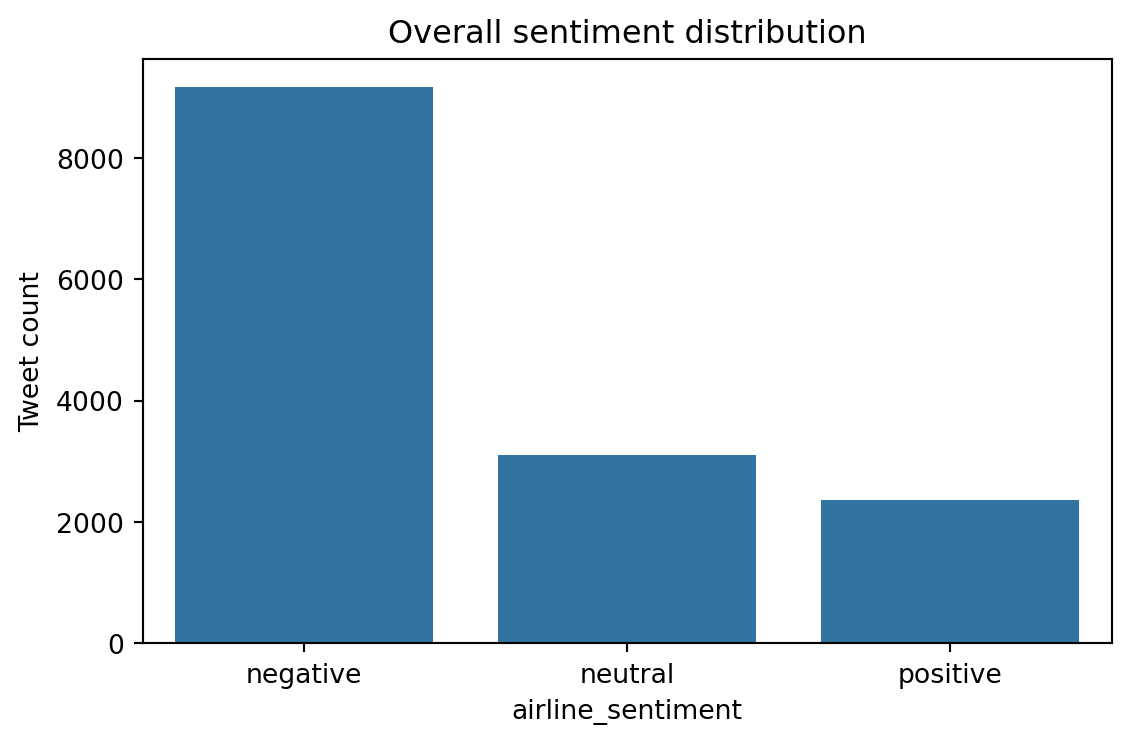

In [ ]:
sent_counts = df["airline_sentiment"].value_counts().sort_index()

plt.figure(figsize=(6, 4))            
sns.barplot(x=sent_counts.index, y=sent_counts.values)
plt.title("Overall sentiment distribution")
plt.ylabel("Tweet count")
plt.tight_layout()
fig_path = FIG_DIR / "fig_sentiment_distribution.png"
plt.savefig(fig_path, dpi=150, bbox_inches="tight")

# 4. Sentiment by Airline
***

The heatmap below shows sentiment counts for each airline.  
The figure is saved to **`reports/fig_sentiment_by_airline.png`**.

| Airline          | Negative | Neutral | Positive |
|------------------|---------:|--------:|---------:|
| American         | 1 960 | 463 | 336 |
| Delta            |   955 | 723 | 544 |
| Southwest        | 1 186 | 664 | 570 |
| US Airways       | 2 263 | 381 | 269 |
| United           | 2 633 | 697 | 492 |
| Virgin America   |   181 | 171 | 152 |

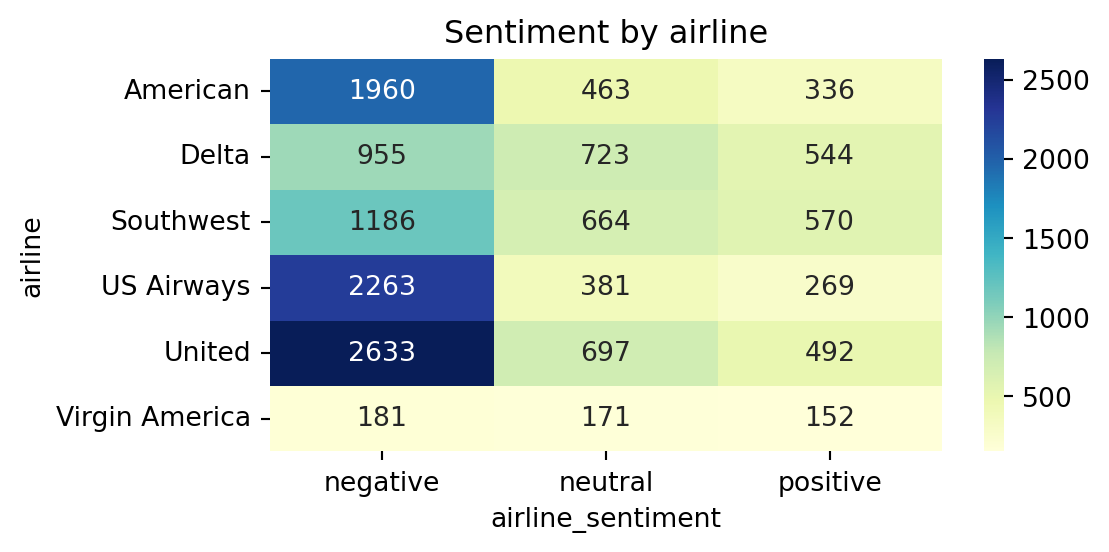

In [4]:
pivot = (
    df.pivot_table(
        index="airline", 
        columns="airline_sentiment", 
        values="tweet_id", 
        aggfunc="count",
        fill_value=0,
    )
    .loc[:, ["negative", "neutral", "positive"]]
)

plt.figure(figsize=(6, 3))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Sentiment by airline")
plt.tight_layout()
fig_path2 = FIG_DIR / "fig_sentiment_by_airline.png"
plt.savefig(fig_path2, dpi=150)

# 5. Key Observations
***

- The dataset is **imbalanced**: 62.7 % negative, 21.2 % neutral, and 16.1 % positive.  
  *Implication*: stratified splits and class weighting will be required to avoid biased models.  
- **United** and **US Airways** receive the highest volumes of negative tweets (2 633 and 2 263 respectively).  
- **American** also attracts many complaints, whereas **Southwest** shows a comparatively higher share of positive tweets.  
- Text preprocessing must address URLs, mentions, casing, and lemmatization before vectorization.  
- The `negativereason` column is populated for ~9 000 rows; it may enable multi‑task learning or error‑analysis later.